<a href="https://colab.research.google.com/github/laurlouie/Seattle-Weather/blob/main/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preparation
---

## Import libraries

The following libraries will be used throughout this colab notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Loading the data

###### We will be working with two csv files named seattle_rain.csv and ny_rain.csv, which are both located in the same github repository as this file. Both datasets were downloaded from the National Centers for Environmental Information, NOAA Climate Data Online search tool.

###### The code below reads both Seattle and New York data sets

In [2]:
#Load Seattle data set
df_seattle = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/seattle_rain.csv')

In [3]:
#Load New York data set
df_ny = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/ny_rain.csv')

# Exploring the contents of the datasets

Inspecting the contents of the Seattle dataset first by taking a look at the first 5 rows and some general descriptive statistics of the file too.

In [ ]:
# first 5 rows of the Seattle dataset
df_seattle.head(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


In [ ]:
# descriptive statistcs of the Seattle dataset
df_seattle.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


Now we can explore into the New York dataset and look at the same functions. First is the first 5 rows of the dataset and then the descriptive statistics for the New York City dataset.



In [ ]:
# first 5 rows of the New York City dataset
df_ny.head(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


In [ ]:
# descriptive statistics of the New York City dataset
df_ny.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,17465.000000,17465.000000,17465.000000,155.000000,151.000000,17275.000000,11508.000000,6318.000000,0.0,0.0
mean,40.826103,-73.697762,48.792551,5.187097,0.835695,0.136644,0.043483,0.255033,NaN,NaN
std,0.189215,0.210564,46.087915,5.581494,1.253480,0.396871,0.520562,1.465410,NaN,NaN
min,40.615654,-74.145561,2.100000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,40.668899,-73.823290,4.300000,2.000000,0.070000,0.000000,0.000000,0.000000,NaN,NaN
50%,40.758947,-73.710999,42.700000,3.000000,0.390000,0.000000,0.000000,0.000000,NaN,NaN
75%,41.091681,-73.505371,91.700000,5.000000,1.010000,0.060000,0.000000,0.000000,NaN,NaN
max,41.150120,-73.358045,175.000000,42.000000,7.000000,9.450000,16.000000,18.000000,NaN,NaN


In [ ]:
# checking data types for the Seattle dataset
df_seattle.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [ ]:
# checking data types for the New York City dataset
df_ny.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [ ]:
# comparing the values in the tables
set(df_seattle.columns)==set(df_ny.columns)

True

The three lines of code above show functions introduced in our classes to exhibit the headers corresponding to each data type to illustrate the dataset's composition.

Given the multitude of variable options, I opted for using the "set" data type to compare the variables present in both the Seattle and New York datasets, to ensure uniformity in the variables being examined.

A significant portion of the headers contain the "NaN" values, making it challenging to find the precise nature of the data without having to further manipulate through the dataset. "Dtypes" verifies the actual data type associated with each variable, showing identification of any necessary alterations.

# Convert data types of columns of the data frames to the correct types

Now we want to check the data types to make sure each column is categorized correctly.

Looking at the "dtypes" code from above, we can see that the "DATE" column is incorrectly classified and needs to be changed for both datasets.

In [4]:
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])

df_ny["DATE"] = pd.to_datetime(df_ny["DATE"])

In [5]:
# checking for the fix in datatype for "DATE" in the Seattle dataset
df_seattle.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [6]:
# checking for the fix in datatype for "DATE" in the New York City dataset
df_ny.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

By changing the "DATE" column of the datasets to a "date/time" datatype, it accurately shows the correct datatype and could also be easier for visualizations down the line. If need be, the function above can change other datatypes too.



## Remove unnecessary parts of the data sets



In [7]:
# dropping the columns we are not interested in.
# the project is only interested in looking at the precipitation, locations, and dates.
bad_columns = ["LATITUDE", "LONGITUDE", "ELEVATION", "DAPR", "MDPR", "SNOW", "SNWD", "DASF", "MDSF"]

df_seattle = df_seattle.drop(columns = bad_columns)
df_ny = df_ny.drop(columns = bad_columns)

In [ ]:
# dropping duplicated rows by "DATE"
df_seattle = df_seattle.drop_duplicates(subset = "DATE")

df_ny = df_ny.drop_duplicates(subset = "DATE")

In this section, variables that were unnecessary to look into were dropped from the dataset and only the important columns we are interested in analyzing were kept. The duplicated dates were also removed since we want to compare each date per station that is logging the data in either Seattle or New York City.

# Identifying missing values in datasets

In [ ]:
# using dropna() method to remove NaN values from PRCP in the Seattle dataset
df_seattle.dropna(subset = ['PRCP'])

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,2020-01-01,0.19
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,2020-01-01,0.23
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,2020-01-01,0.19
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,2020-01-01,0.13
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,2020-01-01,0.22
...,...,...,...,...,...,...
6998,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.444670,-122.314420,2023-12-30,0.10
6999,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,2023-12-31,0.06
7000,US1WAKG0229,"SEATTLE 5.5 NNE, WA US",47.696532,-122.312907,2023-12-31,0.06
7001,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",47.611700,-122.308500,2023-12-31,0.08


In [ ]:
# using dropna() method to remove NaN values from PRCP in the New York City dataset
df_ny.dropna(subset = ['PRCP'])

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2020-01-01,0.00
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,2020-01-01,0.06
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,2020-01-01,0.00
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,2020-01-01,0.00
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,2020-01-01,0.00
...,...,...,...,...,...,...
17460,US1NYSF0158,"LINDENHURST 1.0 NE, NY US",40.695085,-73.358045,2023-12-31,0.00
17461,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,2023-12-31,0.00
17462,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2023-12-31,0.00
17463,US1NYSF0089,"AMITYVILLE 0.1 WSW, NY US",40.668899,-73.418342,2023-12-31,0.00


The dropna() method is very helpful for this data cleaning process as it helps to remove the rows in this case, the "PRCP" or precipitation column. Removing the NULL values will be helpful down the line when we are analyzing data.

# Joining the Seattle and New York dataframes

In [ ]:
# joining the two datasets together
df_merge = df_ny.merge(df_seattle,
                       on = "DATE",
                       how = "left")
df_merge

,STATION_x,NAME_x,LATITUDE_x,LONGITUDE_x,DATE,PRCP_x,STATION_y,NAME_y,LATITUDE_y,LONGITUDE_y,PRCP_y
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2020-01-01,0.0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,0.19
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2020-01-01,0.0,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,0.23
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2020-01-01,0.0,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,0.19
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2020-01-01,0.0,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,0.13
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2020-01-01,0.0,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,0.22
...,...,...,...,...,...,...,...,...,...,...,...
81697,US1NYSF0089,"AMITYVILLE 0.1 WSW, NY US",40.668899,-73.418342,2023-12-31,0.0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.444670,-122.314420,0.00
81698,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,2023-12-31,0.0,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,0.06
81699,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,2023-12-31,0.0,US1WAKG0229,"SEATTLE 5.5 NNE, WA US",47.696532,-122.312907,0.06
81700,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,2023-12-31,0.0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",47.611700,-122.308500,0.08


In [ ]:
# only want to keep the 'DATE' and 'PRCP' columns
# drop duplicates
df_ny = df_ny.drop_duplicates(subset="DATE")
df_seattle = df_seattle.drop_duplicates(subset="DATE")

df = df_ny[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']],
                                   on = 'DATE',
                                   how = 'left')
df


,DATE,PRCP_x,PRCP_y
0,2020-01-01,0.00,0.19
1,2020-01-02,0.00,0.34
2,2020-01-03,0.21,0.26
3,2020-01-04,0.12,0.20
4,2020-01-05,0.00,0.14
...,...,...,...
1456,2023-12-27,0.00,0.00
1457,2023-12-28,2.16,0.26
1458,2023-12-29,0.00,0.08
1459,2023-12-30,0.00,0.02


The codes show the merge between the Seattle and New York City datasets using the merge() function. And below that is just pulling the 'DATE' and 'PRCP' values from the merged table.

# Update* Finding the average rainfall of all stations for each day

I decided to add this new part of data prep/cleaning because it would help a problem that I faced where some of the dates would end up havign blank PRCP values due to the fact that the data would only extract the first station to record the rainfall for that day and not take into account other stations in the respective cities.

In [25]:
# Find the average of all stations for each day
df_seattle_avg = df_seattle.groupby(by= "DATE", as_index=False)["PRCP"].mean()
df_nyc_avg = df_ny.groupby(by= "DATE", as_index=False)["PRCP"].mean()

In [41]:
print(df_seattle_avg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP    1460 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB
None


In [42]:
print(df_nyc_avg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP    1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB
None


# Update* Joining

In [19]:
df_nyc = df_nyc_avg.drop_duplicates(subset="DATE")
df_seattle = df_seattle_avg.drop_duplicates(subset="DATE")

In [22]:
print(df_nyc.info())
print()
print(df_seattle.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP    1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1461 non-null   datetime64[ns]
 1   PRCP    1460 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB
None


In [21]:
# Merging left with NYC on the left.
new_df = df_nyc_avg.merge(df_seattle, on="DATE", how="left")

# Making the data in a tidy format

In [32]:
df_tidydata = pd.melt(new_df,
                  id_vars = 'DATE',
                  var_name = 'CITY',
                  value_name = 'PRCP')

df_tidydata

,DATE,CITY,PRCP
0,2020-01-01,PRCP_x,0.013333
1,2020-01-02,PRCP_x,0.000000
2,2020-01-03,PRCP_x,0.134444
3,2020-01-04,PRCP_x,0.200000
4,2020-01-05,PRCP_x,0.040000
...,...,...,...
2917,2023-12-27,PRCP_y,0.063333
2918,2023-12-28,PRCP_y,0.240000
2919,2023-12-29,PRCP_y,0.055000
2920,2023-12-30,PRCP_y,0.042500


The code uses the `melt()` function from pd library to re-shape the df into a tidy format.

It keeps the 'DATE' column as an identifier variable, while creating two new columns: 'CITY', containing the original column names, and 'PRCP', containing the corresponding vlaues.

In [33]:
# corresponding 'PRCP_x' to New York City (NYC for short) and 'PRCP_y' to Seattle (SEA for short)
df_tidydata.loc[df_tidydata['CITY']=='PRCP_x', 'CITY'] = 'NYC'
df_tidydata.loc[df_tidydata['CITY']=='PRCP_y', 'CITY'] = 'SEA'

df_tidydata

,DATE,CITY,PRCP
0,2020-01-01,NYC,0.013333
1,2020-01-02,NYC,0.000000
2,2020-01-03,NYC,0.134444
3,2020-01-04,NYC,0.200000
4,2020-01-05,NYC,0.040000
...,...,...,...
2917,2023-12-27,SEA,0.063333
2918,2023-12-28,SEA,0.240000
2919,2023-12-29,SEA,0.055000
2920,2023-12-30,SEA,0.042500


Tidying up the merged datasets helps to maintain orderness. Additionally a new column titled 'City' shows the combined data from the columns 'PRCP_y' and 'PRCP_x', otherwise renamed to 'NYC' and 'SEA'.



# Renaming columns and following best practices


In [34]:
# changing the style of the column titles and making it readable.
mapping_dict = {'DATE':'date',
                'CITY':'city',
                'PRCP':'precipitation'}

In [35]:
df_tidy = df_tidydata.rename(
    columns = mapping_dict)
df_tidy

,date,city,precipitation
0,2020-01-01,NYC,0.013333
1,2020-01-02,NYC,0.000000
2,2020-01-03,NYC,0.134444
3,2020-01-04,NYC,0.200000
4,2020-01-05,NYC,0.040000
...,...,...,...
2917,2023-12-27,SEA,0.063333
2918,2023-12-28,SEA,0.240000
2919,2023-12-29,SEA,0.055000
2920,2023-12-30,SEA,0.042500


Renaming the columns of the dataframe to `df_tidy` according to the specified `mapping_dict`, which may contain mappings for renaming certain columns. The resulting dataframe of `df_tidyrain`, displays the updated column names following best practices.

# Update* Figuring out missing values


<Axes: >

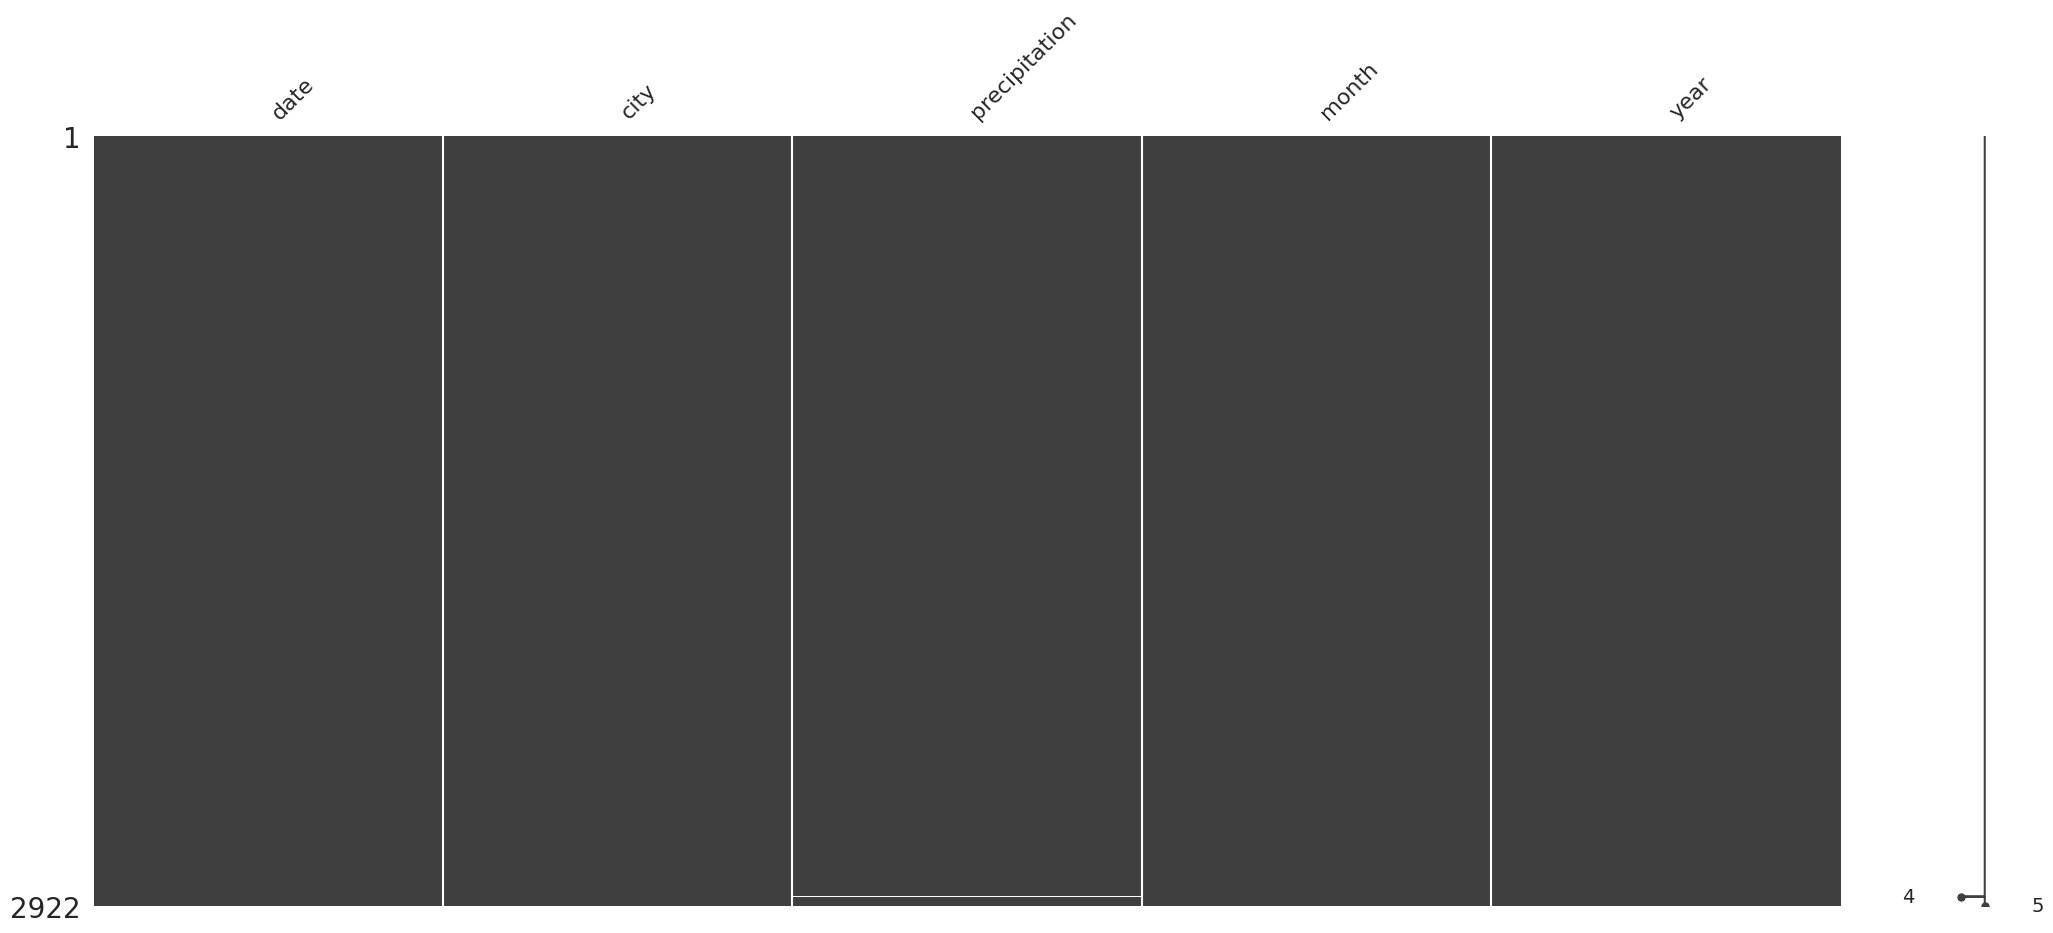

In [38]:
# msno helps to identify missing values
msno.matrix(df_tidy)

In [39]:
# using linear interpolation to fix the missing values
df_tidy["precipitation"] = df_tidy["precipitation"].interpolate()


In [40]:
# checking on how many NaNs are in the new "precipitation" column.
df_tidy["precipitation"].isna().sum()

0

I added this new section because I needed to identify the "NaN" values in my previous dataset and did not use linear interpolation in my previous data cleaning.

Now that we have 0 NaN values, we are good to go with making sure there is no missing data.

# Creating variables that may be useful in the analysis

In [36]:
# adding columns for month and year
df_tidy['month'] = pd.DatetimeIndex(df_tidy
 ['date']).month
df_tidy['year'] = df_tidy['date'].dt.year

df_tidy

,date,city,precipitation,month,year
0,2020-01-01,NYC,0.013333,1,2020
1,2020-01-02,NYC,0.000000,1,2020
2,2020-01-03,NYC,0.134444,1,2020
3,2020-01-04,NYC,0.200000,1,2020
4,2020-01-05,NYC,0.040000,1,2020
...,...,...,...,...,...
2917,2023-12-27,SEA,0.063333,12,2023
2918,2023-12-28,SEA,0.240000,12,2023
2919,2023-12-29,SEA,0.055000,12,2023
2920,2023-12-30,SEA,0.042500,12,2023


By adding the month and year variable columns to the dataset can help aid in visualizations for the future of the project allowing for easy access to look for a specific month and/or year.

# Exporting to a csv file

In [43]:
df_tidy.to_csv('clean_seattle_nyc_weather.csv', index = False)